# Credit Risk Modeling: 'Give Me Some Credit' Dataset

In this notebook, we will perform exploratory data analysis, preprocessing, and build classification models to predict the risk of serious delinquency within the next two years using the 'Give Me Some Credit' dataset from Kaggle.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load Dataset
# Upload the Give Me Some Credit dataset CSV
df = pd.read_csv("cs-training.csv", index_col=0)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Exploratory Data Analysis

In [4]:
# Summary and missing values
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtypes: fl

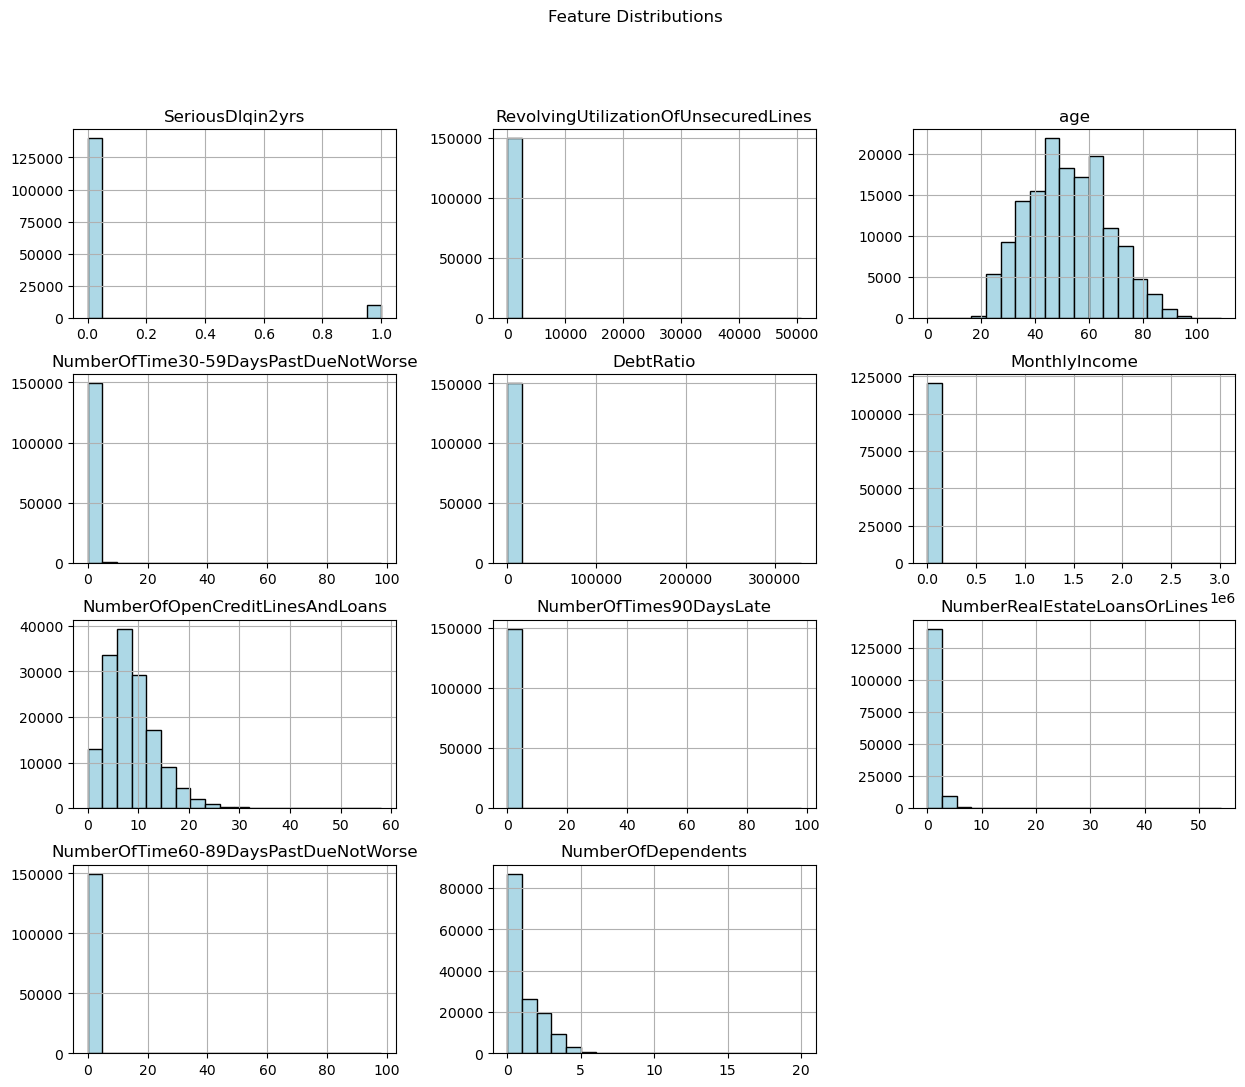

In [5]:
# Univariate Analysis: Visualize distribution of numerical features
df.hist(bins=20, figsize=(15, 12), color='lightblue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

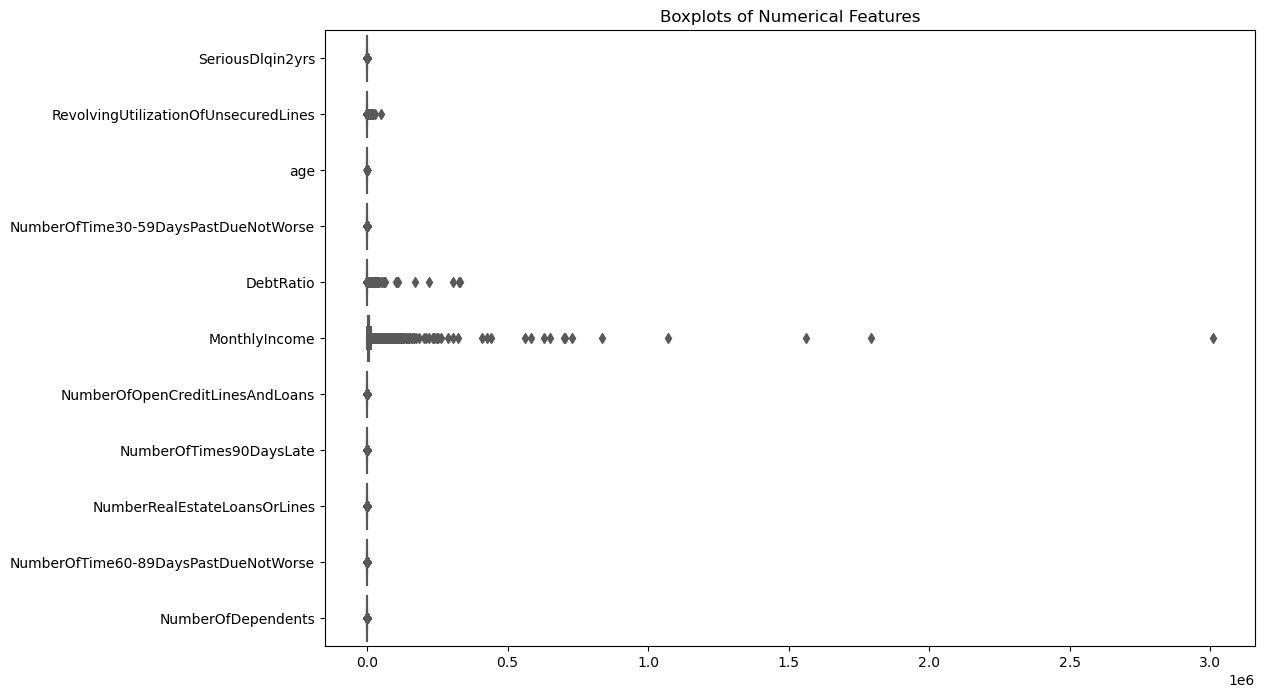

In [6]:
# Boxplots for Numerical Features (detecting outliers)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h', palette='Set2')
plt.title('Boxplots of Numerical Features')
plt.show()

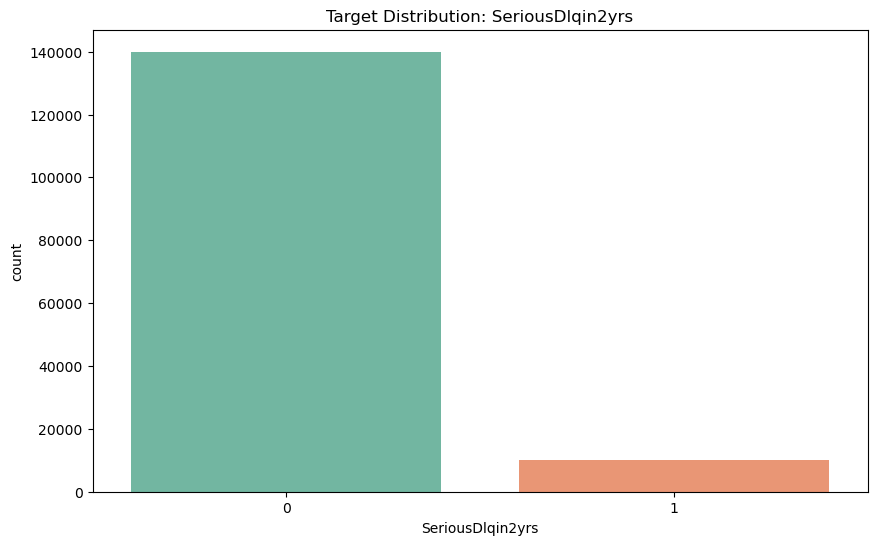

In [7]:
# Bivariate Analysis: Target variable vs Features
plt.figure(figsize=(10, 6))
sns.countplot(x='SeriousDlqin2yrs', data=df, palette='Set2')
plt.title('Target Distribution: SeriousDlqin2yrs')
plt.show()

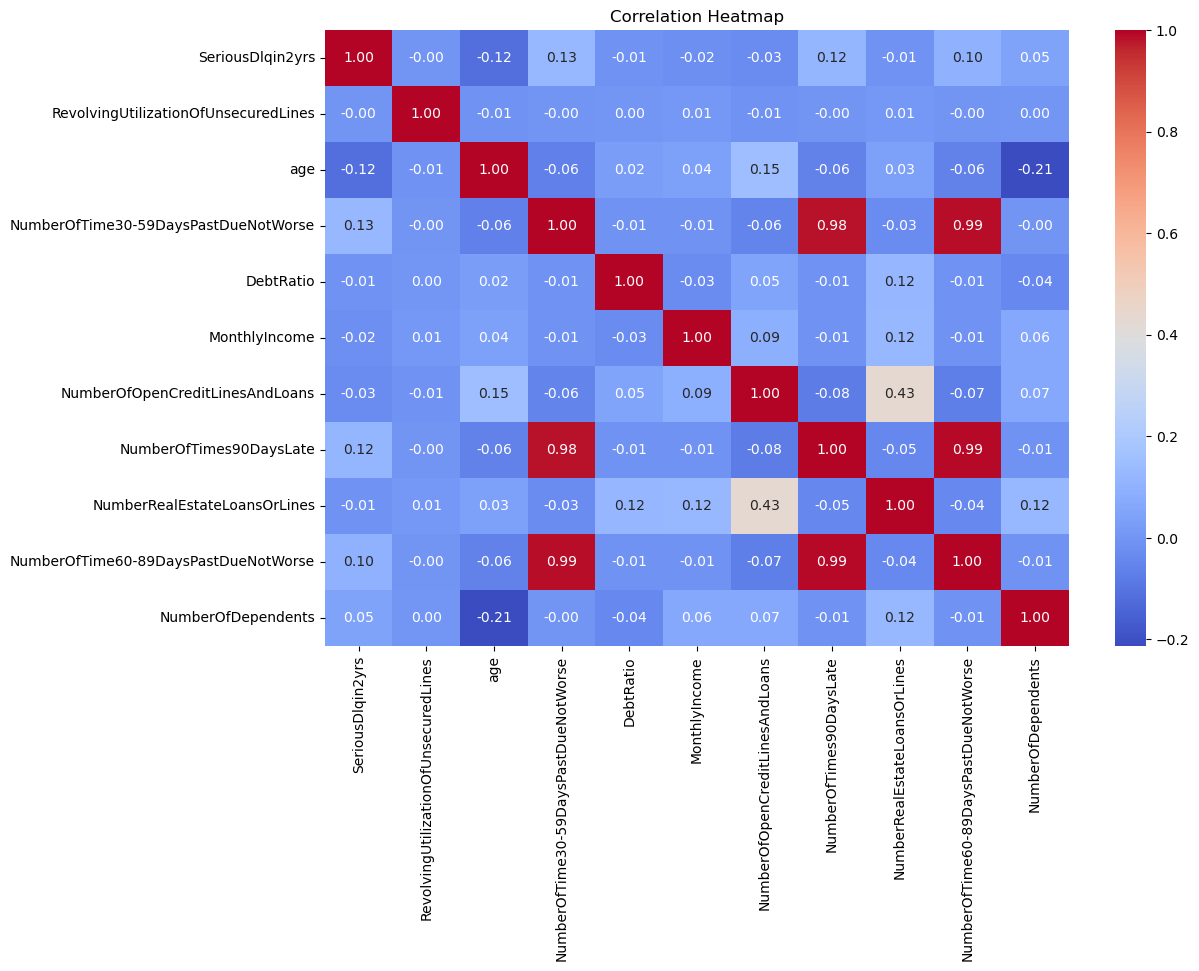

In [8]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

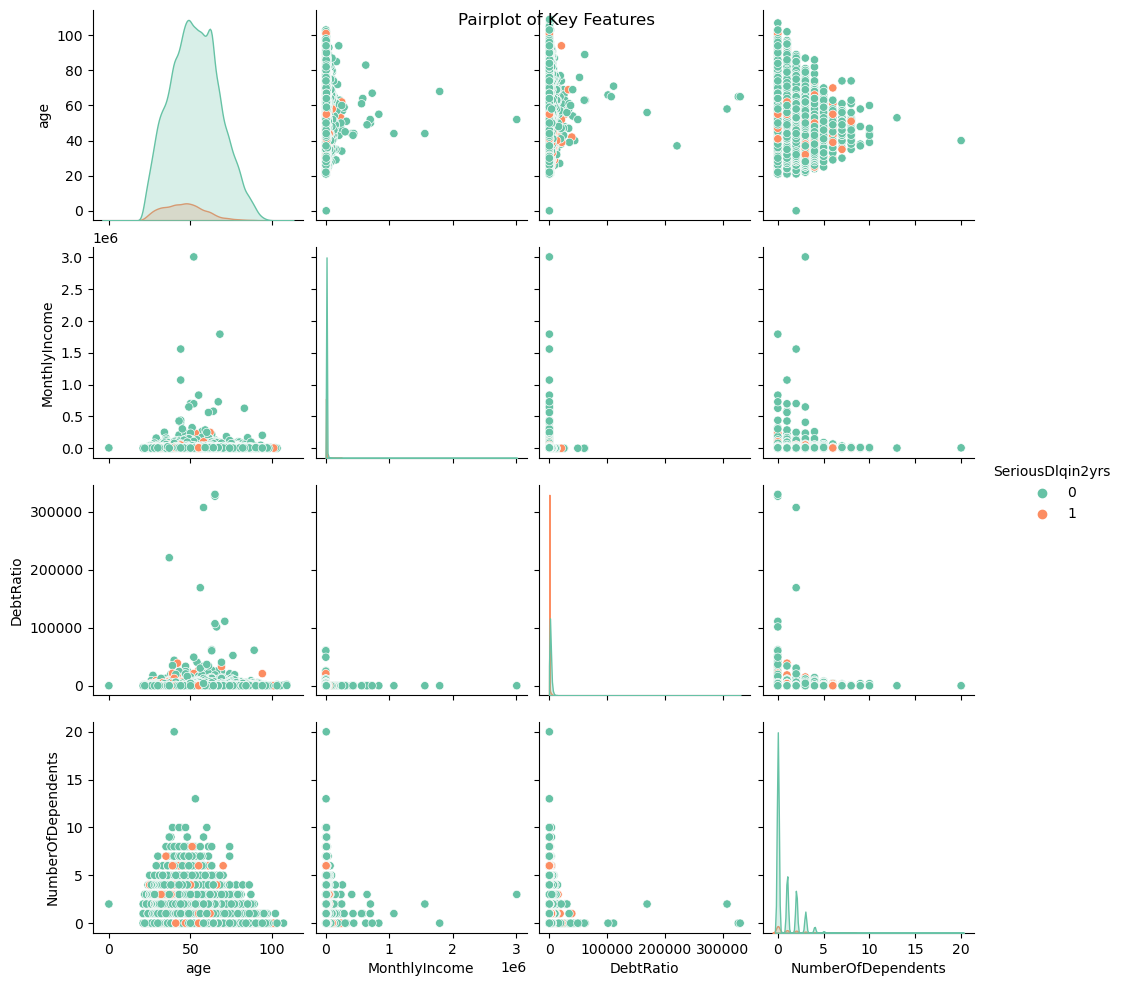

In [9]:
# Pairplot of key features
sns.pairplot(df[['age', 'MonthlyIncome', 'DebtRatio', 'NumberOfDependents', 'SeriousDlqin2yrs']], hue='SeriousDlqin2yrs', palette='Set2')
plt.suptitle('Pairplot of Key Features')
plt.show()

In [10]:
# Impute missing MonthlyIncome with median and remove rows with missing NumberOfDependents
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
df.dropna(inplace=True)

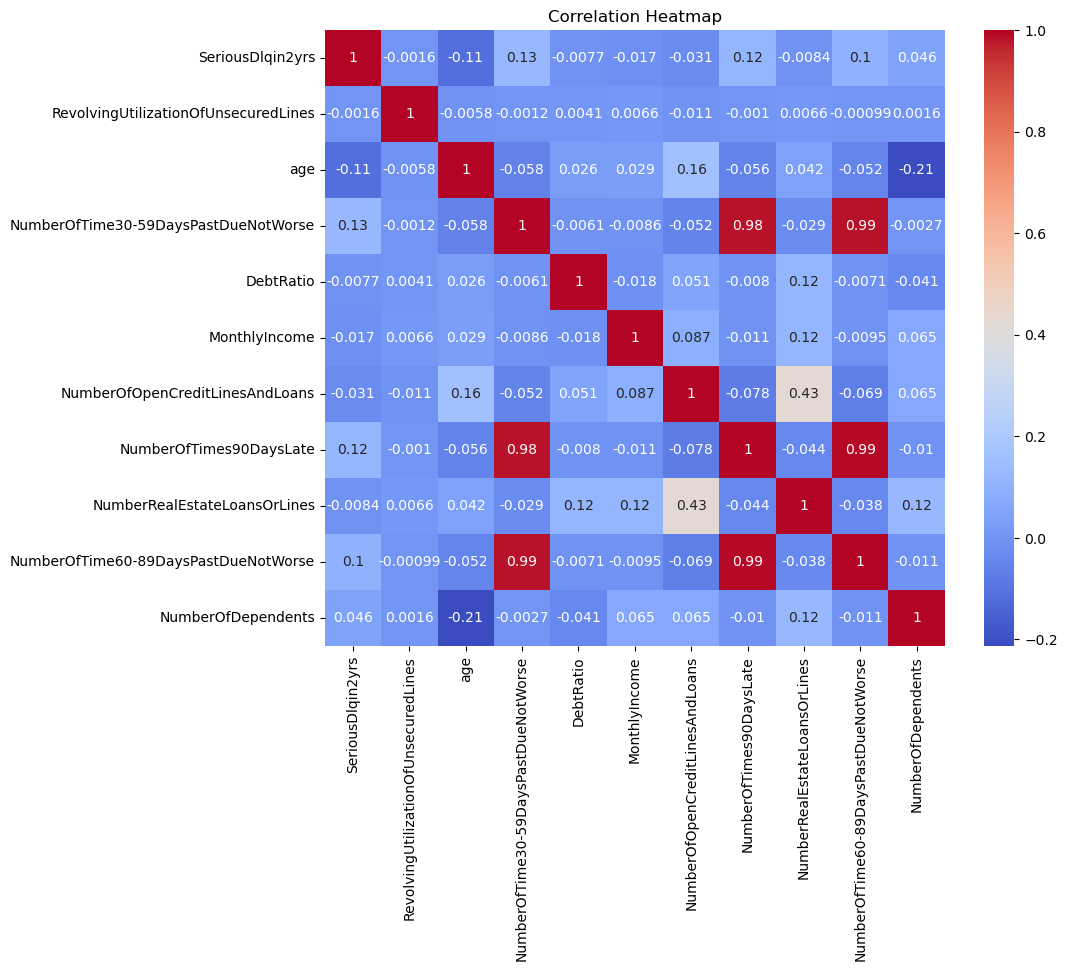

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Preprocessing and Feature Engineering

In [12]:
# Features and target
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

## Model Building and Evaluation

In [13]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_res, y_train_res)

# Predict
y_pred = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))

[[26003  1244]
 [ 1262   707]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     27247
           1       0.36      0.36      0.36      1969

    accuracy                           0.91     29216
   macro avg       0.66      0.66      0.66     29216
weighted avg       0.91      0.91      0.91     29216

ROC AUC Score: 0.821122329494324


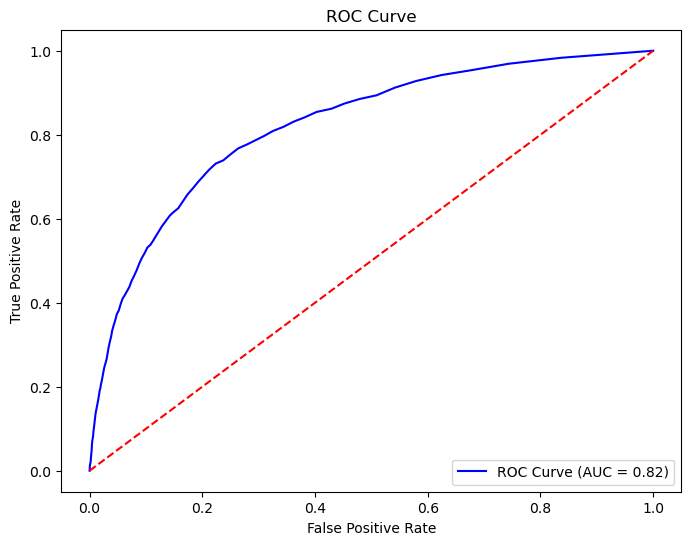

ROC AUC Score: 0.82


In [14]:
# ROC AUC Curve
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Calculate False Positive Rate, True Positive Rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_probs)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random model)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC Score
print(f"ROC AUC Score: {roc_auc_score(y_test, y_probs):.2f}")


## Conclusion

- We balanced the dataset using SMOTE.
- A Random Forest model performed well on the test set.
- ROC AUC Score gives insight into classifier performance.

Next steps: Hyperparameter tuning, model interpretation (SHAP), deployment using Streamlit or Flask.

In [ ]:
# Import SHAP
import shap

# Explain the model's predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled)

# Plot summary plot
shap.summary_plot(shap_values[1], X_test)  # The '1' corresponds to the positive class

# Plot individual prediction explanation
shap.initjs()  # Load JS for interactive plots
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])


In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2,
                           scoring='roc_auc')

# Fit the model
grid_search.fit(X_train_res, y_train_res)

# Best hyperparameters
print(f"Best parameters: {grid_search.best_params_}")

# Best model
best_model = grid_search.best_estimator_

# Predict with the best model
y_pred_best = best_model.predict(X_test_scaled)

# Model Evaluation
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print(f"ROC AUC Score (Best Model): {roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1]):.2f}")


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt

# Model and Data Preprocessing
@st.cache
def load_model():
    # Load pre-trained model (if available) or retrain the model here
    df = pd.read_csv("cs-training.csv", index_col=0)
    
    # Process data
    X = df.drop('SeriousDlqin2yrs', axis=1)
    y = df['SeriousDlqin2yrs']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_scaled, y)
    
    return model, scaler

# SHAP Explainer
@st.cache
def get_shap_values(model, X_scaled):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_scaled)
    return shap_values

# Streamlit UI
st.title("Credit Risk Model - Prediction App")

# Get input from the user (for example, Age, MonthlyIncome, DebtRatio, etc.)
age = st.slider("Age", 18, 100, 30)
monthly_income = st.number_input("Monthly Income", min_value=0, value=4000)
debt_ratio = st.number_input("Debt Ratio", min_value=0.0, value=0.2)
num_dependents = st.number_input("Number of Dependents", min_value=0, value=0)

# Prepare the input data for prediction
input_data = np.array([[age, monthly_income, debt_ratio, num_dependents]])

# Load model and scaler
model, scaler = load_model()

# Scale input data
input_data_scaled = scaler.transform(input_data)

# Prediction
prediction = model.predict(input_data_scaled)
prediction_proba = model.predict_proba(input_data_scaled)[:, 1]

# Show Prediction
if prediction == 0:
    st.write("Prediction: Low Risk of Delinquency")
else:
    st.write("Prediction: High Risk of Delinquency")

st.write(f"Prediction Probability (Delinquent): {prediction_proba[0]:.2f}")

# SHAP Explanation for the Prediction
shap_values = get_shap_values(model, scaler.transform(df.drop('SeriousDlqin2yrs', axis=1)))

# Visualize SHAP Summary Plot
st.write("Feature Importance (SHAP Summary Plot)")
shap.summary_plot(shap_values[1], df.drop('SeriousDlqin2yrs', axis=1))

# Run the app with: streamlit run app.py
